In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
file_path = "/Users/rustem/Downloads/test_habr.csv"
data = pd.read_csv(file_path)

In [6]:
# Создание словаря для хранения результатов
percentiles = {}

# Перебор каждой специальности и каждого грейда
for spec in specializations:
    for grade in grades:
        # Фильтрация данных для текущей специальности и грейда
        filtered_data = data[(data['Specialization'] == spec) & (data['Grade'] == grade)]
        
        # Рассчитываем 95-й перцентиль для зарплаты
        percentile_95 = filtered_data['Salary'].quantile(0.95)
        
        # Добавляем результаты в словарь
        percentiles[(spec, grade)] = percentile_95

# Вывод результатов
for key, value in percentiles.items():
    print(f"95-й перцентиль для {key[0]} {key[1]}: {value}")

95-й перцентиль для Поддержка Senior: 673483.7999999999
95-й перцентиль для Поддержка Middle: 335379.5999999998
95-й перцентиль для Поддержка Junior: 96959.85
95-й перцентиль для Поддержка Intern: 50037.44999999999
95-й перцентиль для Поддержка Teamlead: 953481.3999999999
95-й перцентиль для Маркетинг Senior: 752012.1999999998
95-й перцентиль для Маркетинг Middle: 306624.25
95-й перцентиль для Маркетинг Junior: 95970.0
95-й перцентиль для Маркетинг Intern: 53329.199999999946
95-й перцентиль для Маркетинг Teamlead: 955279.0
95-й перцентиль для Аналитика Senior: 673955.85
95-й перцентиль для Аналитика Middle: 347394.29999999964
95-й перцентиль для Аналитика Junior: 99490.2
95-й перцентиль для Аналитика Intern: 42313.0
95-й перцентиль для Аналитика Teamlead: 1023631.6499999999
95-й перцентиль для Тестирование Senior: 721606.0
95-й перцентиль для Тестирование Middle: 381726.39999999973
95-й перцентиль для Тестирование Junior: 96327.25
95-й перцентиль для Тестирование Intern: 46388.24999999

In [8]:
# Определение аномальных значений на основе интерквартильного размаха #ЧТО ЭТО показывает?
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
anomalies_iqr = data[(data['Salary'] < Q1 - 1.5 * IQR) | (data['Salary'] > Q3 + 1.5 * IQR)]

print("Аномальные значения на основе интерквартильного размаха:")
print(anomalies_iqr)


Аномальные значения на основе интерквартильного размаха:
     User_id   Salary         City Specialization     Grade
9     396203  2000000       Москва      Поддержка  Teamlead
86    809931  2222222       Москва   Тестирование  Teamlead
116   231413  1200000  Владивосток     Разработка  Teamlead
120   809932  2222222       Москва   Тестирование  Teamlead
441   421029  1100000  Владивосток     Разработка  Teamlead
493   210346  1081615       Москва      Поддержка  Teamlead
958   840935  1095417          Уфа   Тестирование  Teamlead


Для грейда Teamlead, нижняя граница: -341129.5, верхняя граница: 1559764.5


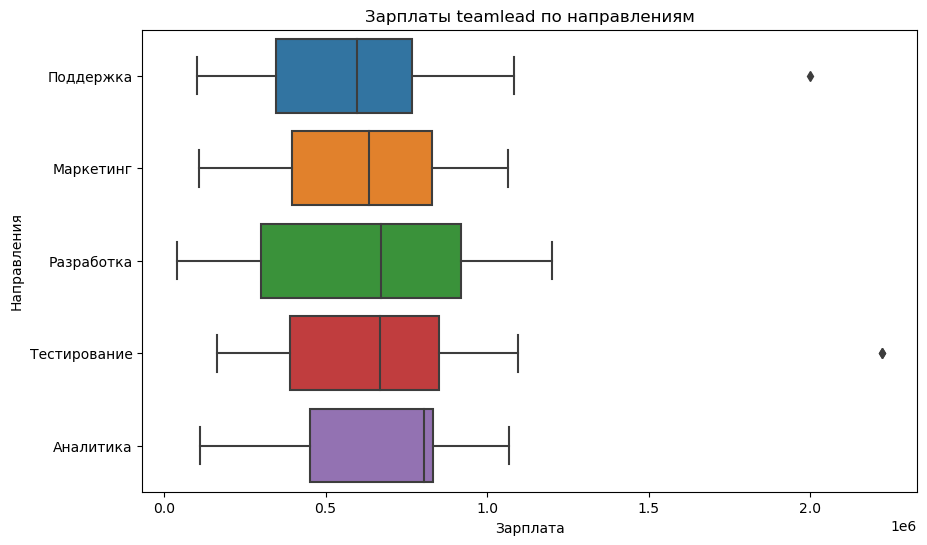

Для грейда Senior, нижняя граница: 22087.25, верхняя граница: 911449.25


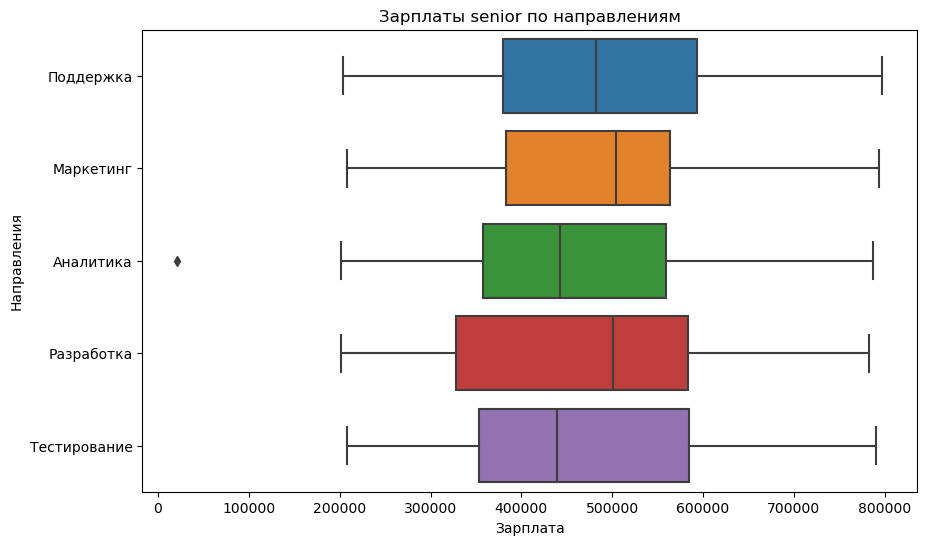

Для грейда Middle, нижняя граница: -12234.75, верхняя граница: 407235.25


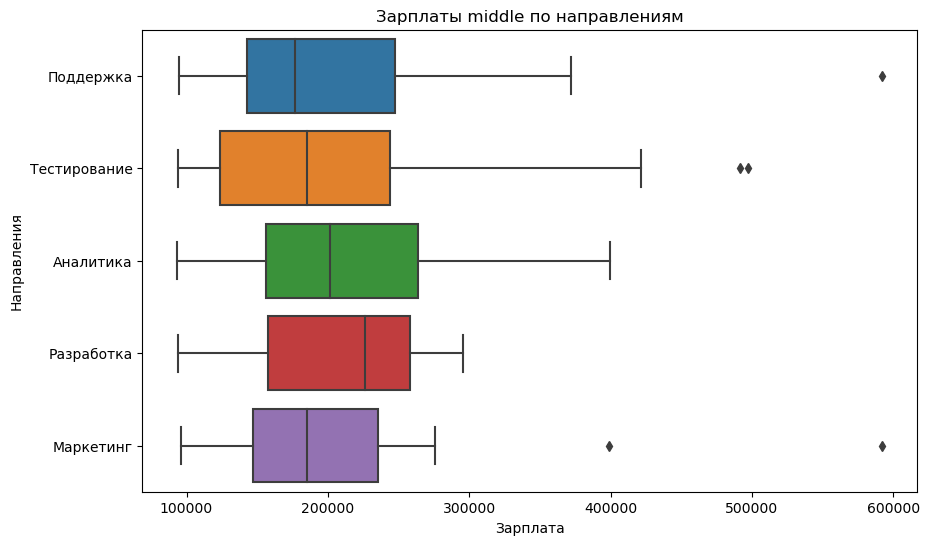

Для грейда Junior, нижняя граница: 20365.5, верхняя граница: 127671.5


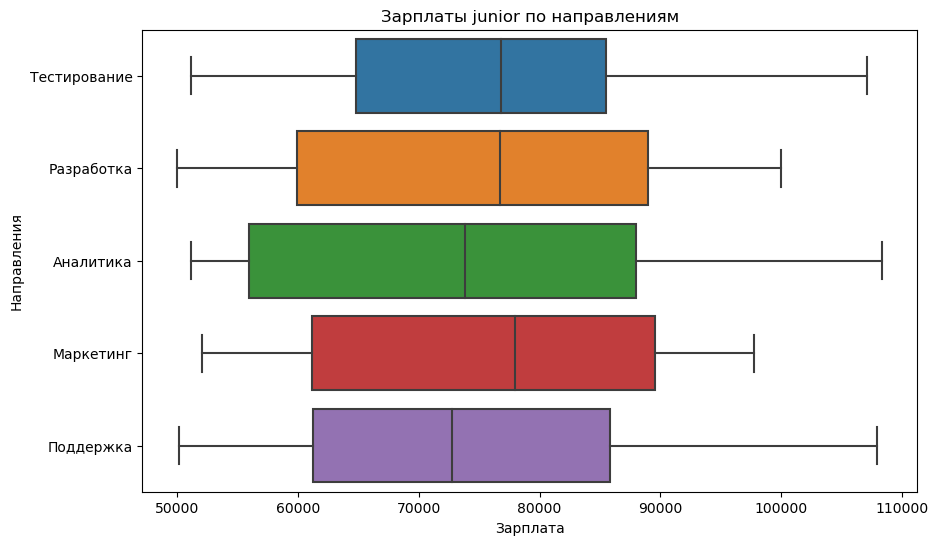

Для грейда Intern, нижняя граница: -31932.125, верхняя граница: 75912.875


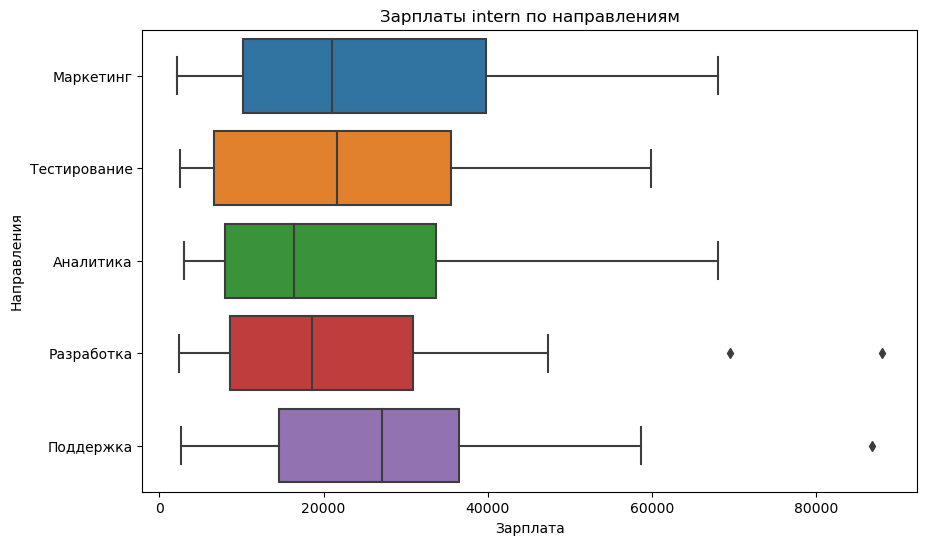

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список грейдов
grades = ['Teamlead', 'Senior', 'Middle', 'Junior', 'Intern']

# Создаем графики для каждого грейда
for grade in grades:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Salary', y='Specialization', data=data[data['Grade'] == grade])
    plt.title(f'Зарплаты {grade.lower()} по направлениям')
    plt.xlabel('Зарплата')
    plt.ylabel('Направления')

    # Получаем квартили
    q1 = data[data['Grade'] == grade]['Salary'].quantile(0.25)
    q3 = data[data['Grade'] == grade]['Salary'].quantile(0.75)

    # Вычисляем межквартильный размах
    iqr = q3 - q1

    # Вычисляем нижнюю и верхнюю границы
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Выводим границы
    print(f"Для грейда {grade}, нижняя граница: {lower_bound}, верхняя граница: {upper_bound}")

    plt.show()